<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/AA_GRUPO3/blob/main/AA_PRACTICA2_GRUPO_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grupo 3
## Integrantes:
Sofía Ángel Carlón

Gabriel Furnieles García

Álvaro García Parra

Ana Alonso Cañizares

# Datos


In [1]:
# Librerías a utilizar
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.2


In [2]:
# CARGAMOS EL CONJUNTO DE DATOS MNIST EN KERAS
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape)

(60000, 28, 28)


In [3]:
# Vemos la matriz de la imagen número 10 (28x28)
import numpy as np
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[9]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   0   0   0   0   0   0   0 164  50   0   7   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   1   0   0   1   1   0   0   5   0  45 217 255 176   0   6   0   0]
 [  0   0   0   0   0   0   0   0   0   1   1   0   3   3   5   9   0   2   0  62 236 231 215  27   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  29 244 231 234  74   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2   0   0   0  23  41  59 111 134 138 226 202 217  22   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   5   0  35 179 195 182 225 198 241 177 199 205 210  26   0   1   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0  19   0   0   0   0   0 235 24

In [4]:
# La imagen anterior corresponde con la sandalia (tacón) asociada al número 5. Hasta se puede intuir.... 
train_labels[9]

5

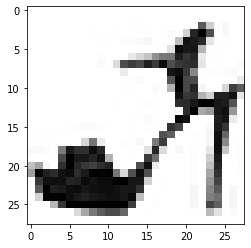

In [5]:
# Veamos el elemento 10 y pintémoslo con matplotlib
import matplotlib.pyplot as plt
digit = train_images[9]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [6]:
# Normalizamos las imágenes

# Imagenes de entrenamiento.
train_images = train_images.astype('float32') / 255

# Imagenes de test.
test_images = test_images.astype('float32') / 255

# Casos


En esta sección se definen y entrenan los tres casos a estudiar en la práctica.

Nuestro problema de clasificación de prendas será secuencial y tendrá una salida con 10 clases correspondientes a los diez tipos de prendas, independientemente del resto de parámetros utilizados, los cuales iremos variando.

También, estarán formados por capas de neuronas convolucionales, donde los píxeles de entrada se irán recorriendo en función del tamaño de las ventanas aplicado en cada capa.

La capa de salida estará formada por 10 neuronas y por la función de activación 'softmax' para que nos devuelva un vector de distribución de probabilidad sobre las clases que buscamos clasificar.

In [7]:
# Librerías a utilizar para construir los modelos
from keras import models
from keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization, Dropout

In [8]:
# Definimos variables que van a contener los resultados de los entrenamientos
HISTORY = []
TEST_LOSS = []
TEST_ACC = []

### Caso 1

In [9]:
modelo_1 = Sequential()
modelo_1.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
modelo_1.add(MaxPooling2D((2, 2)))

modelo_1.add(Conv2D(64, (5, 5), activation='relu', input_shape=(28, 28, 1)))
modelo_1.add(MaxPooling2D((2, 2)))

modelo_1.add(Flatten())
modelo_1.add(Dense(10, activation='softmax'))

modelo_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)                1

En este primer modelo, en la capa convolucional obtenemos 832 parámetros, siendo el tamaño de la ventana 5, filtros aplicados 32 y el umbral 1. Los cálculos quedarían ((5x5)+1))x32. Tras esta capa las nuevas matrices son de 24x24.

A continuación, realizamos las operaciones de pooling con un tamaño de ventana de 2 obteniendo así matrices de 12x12 para los datos de entrada de la segunda capa.
En esta segunda capa convolucional obtenemos 51264 parámetros, las matrices tienen dimensión de 8x8 ya que las ventanas para esta operación siguen siendo de tamaño 5, y aplicando 64 filtros, quedaría ((5x5x32)+1)x64, es decir lo anterior más los nuevos filtros.

De nuevo realizamos maxpooling con una ventana del mismo tamaño (es decir, 2) y obtenemos 64 matrices de 4x4. Estos serán los datos de la última capa.
Para finalizar, se añade una capa flatten apra ajustar los tensores a la entrada de la capa densa softmax, es decir aplanamos, pasando de un tensor 3D a 1D, por lo que nuestra salida es 4x4x64 = 1024 y debido a que son 10 clases con sus respectivos umbrales/bias se obtienen 10250 parámetros.



In [10]:
modelo_1.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history_m1 = modelo_1.fit(train_images, train_labels,
                      batch_size=100,
                      epochs=5)

HISTORY.append(history_m1)

Epoch 1/5
600/600 [==============================] - 6s 5ms/step - loss: 1.1303 - accuracy: 0.6191
Epoch 2/5
600/600 [==============================] - 3s 5ms/step - loss: 0.6647 - accuracy: 0.7576
Epoch 3/5
600/600 [==============================] - 3s 5ms/step - loss: 0.5829 - accuracy: 0.7891
Epoch 4/5
600/600 [==============================] - 3s 5ms/step - loss: 0.5329 - accuracy: 0.8079
Epoch 5/5
600/600 [==============================] - 3s 5ms/step - loss: 0.4987 - accuracy: 0.8227


In [11]:
test_loss_m1, test_acc_m1 = modelo_1.evaluate(test_images, test_labels)
TEST_LOSS.append(test_loss_m1)
TEST_ACC.append(test_acc_m1)

print('Test accuracy:', test_acc_m1)
print('Test loss:', test_loss_m1)

313/313 [==============================] - 2s 5ms/step - loss: 0.5069 - accuracy: 0.8222
Test accuracy: 0.8222000002861023
Test loss: 0.5069315433502197


### Caso 2

In [12]:
modelo_2 = Sequential()
modelo_2.add(Conv2D(64, (7, 7), padding = 'same', activation='relu', input_shape=(28, 28, 1)))
modelo_2.add(MaxPooling2D((2, 2)))

modelo_2.add(Conv2D(128, (3, 3),padding = 'same', activation='relu', input_shape=(28, 28, 1)))
modelo_2.add(MaxPooling2D((2, 2)))

modelo_2.add(Flatten())
modelo_2.add(Dense(65, activation='relu'))
modelo_2.add(Dense(10, activation='softmax'))

modelo_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_1 (Dense)             (None, 65)               

Primera capa convolucional, con una ventana de tamaño 7 y 64 filtros, el resultado son 3200 parámetros: ((7x7)+1)*64 y quedando 64 matrices del mismo tamaño al inicial ya que se ha añadido un hiperparámetro, padding. Obtenemos 64 matrices, a las que ahora aplicaremos pooling con una ventana de tamaño 2 y ahora sí cambian su tamaño a 14x14. 

A continuación, realizamos el maxpooling con una ventana de tamaño 2 obteniendo 128 matrices de tamaño 7x7, estos serán los datos de la siguiente capa. Añadimos una capa faltten por el mismo motivo que en el modelo uno, y obtendremos 407745 parámetros debido a 6272, que corresponden al vector (7x7x128) y eso multiplicado a las 65 neuronas más sus respectivos umbrales, quedando 6272x65 + 65.
Se obtiene en la capa de salida 660 parámetros, de las 10 neuronas por las diez clases quedando 10 x 65 + 10.

In [13]:
modelo_2.compile(loss='sparse_categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

history_m2 = modelo_2.fit(train_images, train_labels,
                          batch_size=100,
                          epochs=5)

HISTORY.append(history_m2)

Epoch 1/5
600/600 [==============================] - 5s 6ms/step - loss: 1.0787 - accuracy: 0.6274
Epoch 2/5
600/600 [==============================] - 4s 6ms/step - loss: 0.6548 - accuracy: 0.7619
Epoch 3/5
600/600 [==============================] - 4s 6ms/step - loss: 0.5777 - accuracy: 0.7904
Epoch 4/5
600/600 [==============================] - 4s 6ms/step - loss: 0.5281 - accuracy: 0.8078
Epoch 5/5
600/600 [==============================] - 4s 6ms/step - loss: 0.4892 - accuracy: 0.8219


In [14]:
test_loss_m2, test_acc_m2 = modelo_2.evaluate(test_images, test_labels)
TEST_LOSS.append(test_loss_m2)
TEST_ACC.append(test_acc_m2)

print('Test accuracy:', test_acc_m2)
print('Test loss:', test_loss_m2)

313/313 [==============================] - 1s 3ms/step - loss: 0.4898 - accuracy: 0.8249
Test accuracy: 0.8248999714851379
Test loss: 0.489761084318161


### Caso 3

In [15]:
modelo_3 = Sequential()
modelo_3.add(Conv2D(64, (7, 7), padding = 'same', activation='relu', input_shape=(28, 28, 1)))
modelo_3.add(MaxPooling2D((2, 2)))

modelo_3.add(Conv2D(128, (3, 3), padding = 'same', activation='relu', input_shape=(28, 28, 1)))
modelo_3.add(MaxPooling2D((2, 2)))

modelo_3.add(Flatten())
modelo_3.add(Dense(65, activation='relu'))
modelo_3.add(Dense(10, activation='softmax'))

modelo_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 65)               

Este caso, es exactamente igual al modelo anterior en cuánto a la explicación del summary, ya que lo único que cambia es el optimizador y veremos a continuación, que influirá en la pérdida y la precisión y que desde ya, se puede decir que se obtendrá una mejoría porque como se explicó en la anterior práctica, adam es mejor optimizador que sgd.


In [16]:
modelo_3.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_m3 = modelo_3.fit(train_images, train_labels,
                      batch_size=100,
                      epochs=5)

HISTORY.append(history_m3)

Epoch 1/5
600/600 [==============================] - 4s 7ms/step - loss: 0.4602 - accuracy: 0.8346
Epoch 2/5
600/600 [==============================] - 4s 7ms/step - loss: 0.2996 - accuracy: 0.8917
Epoch 3/5
600/600 [==============================] - 4s 6ms/step - loss: 0.2548 - accuracy: 0.9069
Epoch 4/5
600/600 [==============================] - 4s 6ms/step - loss: 0.2266 - accuracy: 0.9165
Epoch 5/5
600/600 [==============================] - 4s 6ms/step - loss: 0.1999 - accuracy: 0.9263


In [17]:
test_loss_m3, test_acc_m3 = modelo_3.evaluate(test_images, test_labels)
TEST_LOSS.append(test_loss_m3)
TEST_ACC.append(test_acc_m3)

print('Test accuracy:', test_acc_m3)
print('Test loss:', test_loss_m3)

313/313 [==============================] - 1s 3ms/step - loss: 0.2625 - accuracy: 0.9063
Test accuracy: 0.9063000082969666
Test loss: 0.26254889369010925


### Variantes

#### Variante 1

In [18]:
#Partición del conjunto de datos de entrenamiento
split = 0.25

index = int(len(train_images) * split) # índice a partir del cual se realiza la partición

# Partición imágenes
train_val = train_images[:index]
train_train = train_images[index:]

# Partición etiquetas one-hot encoded
train_labels_val = train_labels[:index]
train_train_labels = train_labels[index:]

In [19]:
modelo_1_variante_1 = Sequential()
modelo_1_variante_1.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
modelo_1_variante_1.add(MaxPooling2D((2, 2)))

modelo_1_variante_1.add(Conv2D(64, (5, 5), activation='relu', input_shape=(28, 28, 1)))
modelo_1_variante_1.add(MaxPooling2D((2, 2)))

modelo_1_variante_1.add(Flatten())
modelo_1_variante_1.add(Dense(10, activation='softmax'))

modelo_1_variante_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 10)               

In [20]:
modelo_1_variante_1.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history_m1_v1 = modelo_1_variante_1.fit(train_images, train_labels,
                      batch_size=100,
                      epochs=25,
                      validation_data = (train_val, train_labels_val))

HISTORY.append(history_m1_v1)

Epoch 1/25
600/600 [==============================] - 4s 6ms/step - loss: 1.1947 - accuracy: 0.5916 - val_loss: 0.7385 - val_accuracy: 0.7349
Epoch 2/25
600/600 [==============================] - 4s 6ms/step - loss: 0.6858 - accuracy: 0.7498 - val_loss: 0.6195 - val_accuracy: 0.7760
Epoch 3/25
600/600 [==============================] - 4s 7ms/step - loss: 0.5977 - accuracy: 0.7820 - val_loss: 0.5579 - val_accuracy: 0.7955
Epoch 4/25
600/600 [==============================] - 3s 5ms/step - loss: 0.5431 - accuracy: 0.8044 - val_loss: 0.5165 - val_accuracy: 0.8087
Epoch 5/25
600/600 [==============================] - 2s 4ms/step - loss: 0.5054 - accuracy: 0.8198 - val_loss: 0.4874 - val_accuracy: 0.8259
Epoch 6/25
600/600 [==============================] - 2s 4ms/step - loss: 0.4796 - accuracy: 0.8291 - val_loss: 0.4504 - val_accuracy: 0.8451
Epoch 7/25
600/600 [==============================] - 2s 4ms/step - loss: 0.4570 - accuracy: 0.8376 - val_loss: 0.4581 - val_accuracy: 0.8348
Epoch 

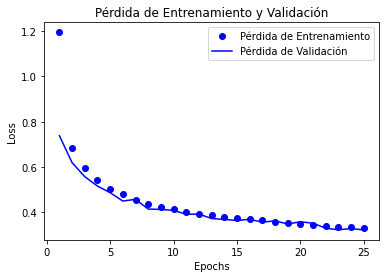

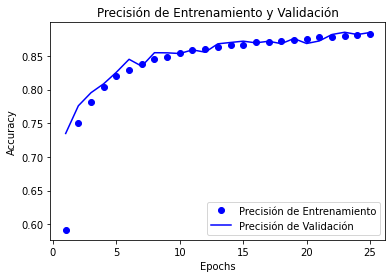

In [21]:
import matplotlib.pyplot as plt

acc = history_m1_v1.history['accuracy']
val_acc = history_m1_v1.history['val_accuracy']
loss = history_m1_v1.history['loss']
val_loss = history_m1_v1.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azul"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# "bo" es para "punto azul"
plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [22]:
test_loss_m1_v1, test_acc_m1_v1 = modelo_1_variante_1.evaluate(test_images, test_labels)
TEST_LOSS.append(test_loss_m1_v1)
TEST_ACC.append(test_acc_m1_v1)

print('Test accuracy:', test_acc_m1_v1)
print('Test loss:', test_loss_m1_v1)

313/313 [==============================] - 1s 3ms/step - loss: 0.3593 - accuracy: 0.8739
Test accuracy: 0.8738999962806702
Test loss: 0.35934844613075256


#### Variante 2

Descripción variante

In [23]:
modelo_1_variante_2 = Sequential()
modelo_1_variante_2.add(Conv2D(32, (5, 5), activation='tanh', input_shape=(28, 28, 1)))
modelo_1_variante_2.add(MaxPooling2D((2, 2)))

modelo_1_variante_2.add(Conv2D(64, (5, 5), activation='tanh', input_shape=(28, 28, 1)))
modelo_1_variante_2.add(MaxPooling2D((2, 2)))

modelo_1_variante_2.add(Flatten())
modelo_1_variante_2.add(Dense(10, activation='softmax'))

modelo_1_variante_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 10)               

In [24]:
modelo_1_variante_2.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history_m1_v2 = modelo_1_variante_2.fit(train_images, train_labels,
                      batch_size=100,
                      epochs=5)

HISTORY.append(history_m1_v2)

Epoch 1/5
600/600 [==============================] - 4s 6ms/step - loss: 1.1269 - accuracy: 0.6441
Epoch 2/5
600/600 [==============================] - 2s 3ms/step - loss: 0.6670 - accuracy: 0.7551
Epoch 3/5
600/600 [==============================] - 2s 4ms/step - loss: 0.5880 - accuracy: 0.7842
Epoch 4/5
600/600 [==============================] - 3s 4ms/step - loss: 0.5397 - accuracy: 0.8045
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 0.5051 - accuracy: 0.8192


In [25]:
test_loss_m1_v2, test_acc_m1_v2 = modelo_1_variante_2.evaluate(test_images, test_labels)
TEST_LOSS.append(test_loss_m1_v2)
TEST_ACC.append(test_acc_m1_v2)

print('Test accuracy:', test_acc_m1_v2)
print('Test loss:', test_loss_m1_v2)

313/313 [==============================] - 1s 3ms/step - loss: 0.5227 - accuracy: 0.8093
Test accuracy: 0.8093000054359436
Test loss: 0.5227272510528564


#### Variantes Batch_Normalization y Dropout

Elegimos añadir Dropout y Batch normalization al caso 3, ya que es modelo que mejores resultados nos ha dado. Es decir, probamos a optimizar el mejor de los modelos.

El dropout es una de las técnicas de regularización más efectivas que al aplicar a una capa pone a cero aletoriamente un número de características, 
que dependerá de la tasa que se ponga, en la capa de salida durante el entrenamiento.

Por otro lado, la normalización de capas por lotes realiza una transformación que mantiene la media cercana a cero y la desviación estándar cercana a uno.
Es importante destacar que funciona de diferente manera durante el entrenamiento y durante la validación. Durante el entrenamiento la capa se normaliza en base a la media y desviación del lote actual de entradas, en cambio en la validación utiliza la media y desviación estándar móvil de los lotes vistos durante el entrenamiento.

In [26]:
modelo_3_variante_3 = Sequential()
modelo_3_variante_3.add(Conv2D(64, (7, 7), padding = 'same', activation='relu', input_shape=(28, 28, 1)))
modelo_3_variante_3.add(MaxPooling2D((2, 2)))
modelo_3_variante_3.add(BatchNormalization())
modelo_3_variante_3.add(Dropout(0.2))

modelo_3_variante_3.add(Conv2D(128, (3, 3), padding = 'same', activation='relu', input_shape=(28, 28, 1)))
modelo_3_variante_3.add(MaxPooling2D((2, 2)))
modelo_3_variante_3.add(BatchNormalization())
modelo_3_variante_3.add(Dropout(0.2))

modelo_3_variante_3.add(Flatten())
modelo_3_variante_3.add(Dense(65, activation='relu'))
modelo_3_variante_3.add(BatchNormalization())
modelo_3_variante_3.add(Dropout(0.2))

modelo_3_variante_3.add(Dense(10, activation='softmax'))

modelo_3_variante_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 128)       

In [27]:
modelo_3_variante_3.compile(loss='sparse_categorical_crossentropy',
                            optimizer='adam',
                            metrics=['accuracy'])

history_m3_v3 = modelo_3_variante_3.fit(train_images, train_labels,
                      batch_size=100,
                      epochs=5)

HISTORY.append(history_m3_v3)

Epoch 1/5
600/600 [==============================] - 6s 8ms/step - loss: 0.4065 - accuracy: 0.8549
Epoch 2/5
600/600 [==============================] - 5s 8ms/step - loss: 0.2915 - accuracy: 0.8947
Epoch 3/5
600/600 [==============================] - 5s 8ms/step - loss: 0.2556 - accuracy: 0.9079
Epoch 4/5
600/600 [==============================] - 6s 9ms/step - loss: 0.2362 - accuracy: 0.9135
Epoch 5/5
600/600 [==============================] - 5s 8ms/step - loss: 0.2185 - accuracy: 0.9190


In [28]:
test_loss_m3_v3, test_acc_m3_v3 = modelo_3_variante_3.evaluate(test_images, test_labels)
TEST_LOSS.append(test_loss_m3_v3)
TEST_ACC.append(test_acc_m3_v3)

print('Test accuracy:', test_acc_m3_v3)
print('Test loss:', test_loss_m3_v3)

313/313 [==============================] - 1s 3ms/step - loss: 0.2618 - accuracy: 0.9052
Test accuracy: 0.9052000045776367
Test loss: 0.2617867887020111


Se empieza probando normalización y dropout en todas las capas, con una tasa de 0.2 y manteniendo el número de épocas y no se obtiene ninguna mejoría, aunque tampoco empeora.
Siguiendo con una normalización en todas las capas pero manteniendo el regularizador en la última con la misma tasa, si se obtiene una mejora en los datos de entrenamiento pero no en los de test, por lo que no nos interesa.

¿Y si aumentamos la tasa de dropout? Definitivamente y tras varias pruebas se concluye que no produce mejorías.

In [29]:
# TEST -> loss: 0.2485 - accuracy: 0.9129 con 6 épocas y batch_size 150
modelo_3_mejorado1 = Sequential()
modelo_3_mejorado1.add(Conv2D(64, (7, 7), padding = 'same', activation='relu', input_shape=(28, 28, 1)))
modelo_3_mejorado1.add(MaxPooling2D((2, 2)))

modelo_3_mejorado1.add(Conv2D(128, (3, 3), padding = 'same', activation='relu', input_shape=(28, 28, 1)))
modelo_3_mejorado1.add(MaxPooling2D((2, 2)))

modelo_3_mejorado1.add(Flatten())
modelo_3_mejorado1.add(Dense(65, activation='relu'))
modelo_3_mejorado1.add(BatchNormalization())
modelo_3_mejorado1.add(Dropout(0.2))

modelo_3_mejorado1.add(Dense(10, activation='softmax'))

modelo_3_mejorado1.summary()


# TEST -> loss: 0.2452 - accuracy: 0.9153 con 5 épocas y batch_size 180
modelo_3_mejorado2 = Sequential()
modelo_3_mejorado2.add(Conv2D(64, (7, 7), padding = 'same', activation='relu', input_shape=(28, 28, 1)))
modelo_3_mejorado2.add(MaxPooling2D((2, 2)))

modelo_3_mejorado2.add(Conv2D(128, (3, 3), padding = 'same', activation='relu', input_shape=(28, 28, 1)))
modelo_3_mejorado2.add(MaxPooling2D((2, 2)))

#modelo_3_mejorado2.add(Conv2D(64, (5, 5), padding = 'same', activation='relu', input_shape=(28, 28, 1)))
#modelo_3_mejorado2.add(MaxPooling2D((2, 2)))

modelo_3_mejorado2.add(Flatten())
modelo_3_mejorado2.add(Dense(65, activation='relu'))
modelo_3_mejorado2.add(BatchNormalization())
modelo_3_mejorado2.add(Dropout(0.20))

modelo_3_mejorado2.add(Dense(10, activation='softmax'))

modelo_3_mejorado2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 6272)              0         
                                                                 
 dense_9 (Dense)             (None, 65)               

In [30]:
print("Modelo mejorado 1")
modelo_3_mejorado1.compile(loss='sparse_categorical_crossentropy',
                            optimizer='adam',
                            metrics=['accuracy'])

history_m3_mejor1 = modelo_3_mejorado1.fit(train_images, train_labels,
                      batch_size=150,
                      epochs=6,
                      validation_data = (train_val, train_labels_val))

HISTORY.append(history_m3_mejor1)

print("Modelo mejorado 2")

modelo_3_mejorado2.compile(loss='sparse_categorical_crossentropy',
                            optimizer='adam',
                            metrics=['accuracy'])

history_m3_mejor2 = modelo_3_mejorado2.fit(train_images, train_labels,
                      batch_size=180,
                      epochs=5,
                      validation_data = (train_val, train_labels_val))

HISTORY.append(history_m3_mejor2)

Modelo mejorado 1
Epoch 1/6
400/400 [==============================] - 6s 14ms/step - loss: 0.4099 - accuracy: 0.8593 - val_loss: 0.3384 - val_accuracy: 0.8887
Epoch 2/6
400/400 [==============================] - 5s 13ms/step - loss: 0.2804 - accuracy: 0.9004 - val_loss: 0.2159 - val_accuracy: 0.9207
Epoch 3/6
400/400 [==============================] - 5s 14ms/step - loss: 0.2445 - accuracy: 0.9125 - val_loss: 0.2307 - val_accuracy: 0.9139
Epoch 4/6
400/400 [==============================] - 5s 14ms/step - loss: 0.2219 - accuracy: 0.9204 - val_loss: 0.2490 - val_accuracy: 0.9114
Epoch 5/6
400/400 [==============================] - 6s 14ms/step - loss: 0.2018 - accuracy: 0.9263 - val_loss: 0.1682 - val_accuracy: 0.9399
Epoch 6/6
400/400 [==============================] - 6s 15ms/step - loss: 0.1833 - accuracy: 0.9343 - val_loss: 0.1478 - val_accuracy: 0.9447
Modelo mejorado 2
Epoch 1/5
334/334 [==============================] - 7s 18ms/step - loss: 0.4247 - accuracy: 0.8543 - val_loss: 

In [31]:
print("Modelo mejorado 1")
test_loss_m3_m1, test_acc_m3_m1 = modelo_3_mejorado1.evaluate(test_images, test_labels)
TEST_LOSS.append(test_loss_m3_m1)
TEST_ACC.append(test_acc_m3_m1)

print('Test accuracy:', test_acc_m3_m1)
print('Test loss:', test_loss_m3_m1)

print("Modelo mejorado 2")
test_loss_m3_m2, test_acc_m3_m2 = modelo_3_mejorado2.evaluate(test_images, test_labels)
TEST_LOSS.append(test_loss_m3_m2)
TEST_ACC.append(test_acc_m3_m2)

print('Test accuracy:', test_acc_m3_m2)
print('Test loss:', test_loss_m3_m2)

Modelo mejorado 1
313/313 [==============================] - 1s 4ms/step - loss: 0.2587 - accuracy: 0.9095
Test accuracy: 0.909500002861023
Test loss: 0.25866755843162537
Modelo mejorado 2
313/313 [==============================] - 1s 4ms/step - loss: 0.2928 - accuracy: 0.8971
Test accuracy: 0.8970999717712402
Test loss: 0.292752206325531


Dado esta conclusión anterior, la tasa de dropout se establece en 0.25 y se opta por cambiar la normalización, es decir, en vez de incluirla en todas las capas, se prueba a ponerla solo en la última, de esta manera se obtiene una mejoría.

Por un lado uno de los modelos en lo que se obtiene una mejoría en la precisión de hasta 1% con una tasa de dropout de 0.2 y normalización en la última capa, además de aumentar el número de épocas a 6 y un batch size de 150.

Otro modelo en el que se obtiene mejoría en la precisión con cerca del 1%, tiene una tasa de 0.25 en dropout y normalización en la última capa pero el batch size a 180.

#### Prueba con regularizador l1

In [32]:
from keras import regularizers

prueba = Sequential()
prueba.add(Conv2D(64, (7, 7) ,padding = 'same', activation='relu', input_shape=(28, 28, 1)))
prueba.add(MaxPooling2D((2, 2)))

prueba.add(Conv2D(128, (3, 3), padding = 'same', activation='relu', input_shape=(28, 28, 1)))
prueba.add(MaxPooling2D((2, 2)))

prueba.add(Flatten())
prueba.add(Dense(65, kernel_regularizer = regularizers.l1(0.001),activation='relu'))

prueba.add(Dense(10, activation='softmax'))

prueba.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 6272)              0         
                                                                 
 dense_13 (Dense)            (None, 65)               

In [33]:
prueba.compile(loss='sparse_categorical_crossentropy',
                            optimizer='adam',
                            metrics=['accuracy'])

history_prueba = prueba.fit(train_images, train_labels,
                      batch_size=80,
                      epochs=13,
                      validation_data = (train_val, train_labels_val))

HISTORY.append(history_prueba)

Epoch 1/13
750/750 [==============================] - 6s 7ms/step - loss: 1.0683 - accuracy: 0.7909 - val_loss: 0.6332 - val_accuracy: 0.8469
Epoch 2/13
750/750 [==============================] - 6s 8ms/step - loss: 0.5986 - accuracy: 0.8519 - val_loss: 0.5664 - val_accuracy: 0.8555
Epoch 3/13
750/750 [==============================] - 5s 7ms/step - loss: 0.5305 - accuracy: 0.8686 - val_loss: 0.4944 - val_accuracy: 0.8777
Epoch 4/13
750/750 [==============================] - 5s 7ms/step - loss: 0.4971 - accuracy: 0.8795 - val_loss: 0.4686 - val_accuracy: 0.8833
Epoch 5/13
750/750 [==============================] - 6s 7ms/step - loss: 0.4728 - accuracy: 0.8849 - val_loss: 0.4823 - val_accuracy: 0.8781
Epoch 6/13
750/750 [==============================] - 6s 9ms/step - loss: 0.4556 - accuracy: 0.8894 - val_loss: 0.4422 - val_accuracy: 0.8942
Epoch 7/13
750/750 [==============================] - 6s 8ms/step - loss: 0.4436 - accuracy: 0.8931 - val_loss: 0.4199 - val_accuracy: 0.9031
Epoch 

In [34]:
test_loss_m3_m1, test_acc_m3_m1 = modelo_3_mejorado1.evaluate(test_images, test_labels)
TEST_LOSS.append(test_loss_m3_m1)
TEST_ACC.append(test_acc_m3_m1)

print('Test accuracy:', test_acc_m3_m1)
print('Test loss:', test_loss_m3_m1)

313/313 [==============================] - 1s 3ms/step - loss: 0.2587 - accuracy: 0.9095
Test accuracy: 0.909500002861023
Test loss: 0.25866755843162537


Hemos decidido probar con otro regularizador (l1) para ver si mejoraba el modelo y aunque no lo mejora, obtenemos una precisión bastante alta, 0.9.

Bajamos el 'batch_size', ya que al aplicar el regularizador será más difícil que se sobreentrene.

#### Variante con callbacks

Una "callback" va reduciendo el valor del 'learning rate' de forma exponencial en función de la distancia a la que se encuentre del mínimo absoluto (por ejemplo, al comienzo o al final de una época, antes o después de un solo lote, etc.). 

De esta manera, saltará los mínimos locales y llegará antes y con mayor seguridad al mínimo absoluto.

Además, se puede utilizar una callback para escribir registros de TensorBoard después de cada lote para monitorear sus métricas como la precisión y la función de pérdida durante el entrenamiento como en los conjuntos de validación y/o test.  


In [62]:
modelo_3_variante_4 = Sequential()
modelo_3_variante_4.add(Conv2D(64, (7, 7), padding='same', activation='relu', input_shape=(28, 28, 1)))
modelo_3_variante_4.add(MaxPooling2D((2, 2)))

modelo_3_variante_4.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
modelo_3_variante_4.add(MaxPooling2D((2, 2)))

modelo_3_variante_4.add(Flatten())
modelo_3_variante_4.add(Dense(65, activation='relu'))
modelo_3_variante_4.add(Dense(10, activation='softmax'))
modelo_3_variante_4.summary()


modelo_3_variante_4.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
def scheduler(epoch, lr):
    if epoch < 1:
        return lr
    else:
        return lr * tf.math.exp(-0.1)


callback = tf.keras.callbacks.LearningRateScheduler(scheduler)


modelo_3_variante_4.fit(train_images, train_labels,
          batch_size=100,
          epochs=25,
          callbacks=[callback])

test_loss, test_acc = modelo_3_variante_4.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 6272)              0         
                                                                 
 dense_17 (Dense)            (None, 65)              

Al realizar esta variante podemos ver el funcionamiento de la función a utilizar 'callback', sin embargo, no obtenemos una mejoría en el modelo, por lo que concluimos que no será óptimo.

# Resultados

### Funciones para graficar

In [36]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Curvas de aprendizaje
"""
Notas: Los elementos de HISTORY son diccionarios que contienen los nombres de las métricas como claves 
y sus valores (.values()) son listas con los valores de las métricas durante el entrenamiento model.fit
"""
def curvas_aprendizaje(HISTORY, nfilas, ncol, size = (18,10), title = []):
    # Función para imprimir las curvas de aprendizaje en una rejilla de nfilas x ncol
    # Argumentos: HISTORY = Lista con variables history de keras (obtenidas de model.fit)
    #        nfilas, ncol = Nº de filas y columnas de la rejilla
    #                size = Tamaño total de la rejilla (por defecto es (18,10))
    # !Importante: El nº total de filas x col debe ser superiror al de los elementos pasados como argumento en HISTORY
    if len(HISTORY) > nfilas*ncol:
        print("Error. Dimensiones incompatibles")
        return 0
    else:
        fig = plt.figure(figsize=size) # Especifica tamaño de la figura

        for i, registro in enumerate(HISTORY):

            plt.subplot(nfilas, ncol, i+1) # Añade subplot (gráfica para un modelo)
            if title:
              plt.title(title[i])
            else:
              plt.title("Modelo " + str(i+1)) # Formato de cada gráfica
            plt.xlabel('Épocas')
            plt.ylim((0,2))

            acc = registro.history['accuracy']
            loss = registro.history['loss']

            x = list(range(1, len(acc) + 1))

            plt.plot(x, loss, 'o-') # Imprime 
            plt.plot(x, acc, 'o-')

            plt.xticks(x)
            plt.legend(list(registro.history.keys()))
            plt.text(len(x), loss[len(loss)-1], str(round(loss[len(loss)-1],3))) # Valor punto final  loss
            plt.text(len(x), acc[len(acc)-1], str(round(acc[len(acc)-1],3))) # Valor punto final  loss

    fig.tight_layout()
    plt.show()


# Entrenamiento-validacion
def entrenamiento_validacion(HISTORY, nfilas, ncol, title, size = (18,10)):
  if len(HISTORY) < nfilas*ncol:
    print("Error. Dimensiones incompatibles")
    return 0
  else:
    fig = plt.figure(figsize=size) # Especifica tamaño de la figura

  for i, history in enumerate(HISTORY):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.subplot(nfilas, ncol, i+1)

    # "bo" es para "punto azun"
    plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
    # "b" es para "linea continua azul"
    plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
    plt.title(title[i])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

  plt.show()



# Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

def show_confusion_matrix(predictions):
    # Predicción de valores desde el dataset de validación
    Y_pred = predictions
    # Convertir en predicciones de clases desde los vectores one-hot encoding 
    Y_pred_classes = np.argmax(Y_pred, axis = 1) 
    # Convertir en clases de observación desde los vectores one-hot encoding
    Y_true = test_labels #np.argmax(test_labels, axis = 1) 
    # Computar la matriz de confusión
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    # Dibujar la matriz de confusión
    plot_confusion_matrix(confusion_mtx, classes = range(10))

# Prediction distributions
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)    

    predicted_label = np.argmax(predictions_array)  
    if predicted_label.all() == true_label.all():
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                  100*np.max(predictions_array),
                                  true_label),
                                  color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('black')

def show_predicted_distributions(predictions, n):
    Y_true = test_labels # np.argmax(test_labels, axis = 1)
    for i in range(n):
      plt.figure(figsize=(6,3))
      plt.subplot(1,2,1)
      plot_image(i, predictions[i], Y_true, test_images.reshape(10000,28,28))
      plt.subplot(1,2,2)
      plot_value_array(i, predictions[i],  Y_true)
      plt.show()
      plt.clf()

def show_single_predicted_dist(predictions, i, title):
      Y_true = test_labels # np.argmax(test_labels, axis = 1)
      plt.figure(figsize=(6,3))
      plt.subplot(1,2,1)
      plot_image(i, predictions[i], Y_true, test_images.reshape(10000,28,28))
      plt.subplot(1,2,2)
      plot_value_array(i, predictions[i],  Y_true)

      plt.title(title)
      plt.tight_layout()
      plt.show()



# Gráfico de barras horizontales
def testerror_testacc(ERROR, ACC, titles, size = (12,12)):
    fig = plt.figure(figsize=size) # Especifica tamaño de la figura

    # Ordena pérdida en orden ascendente y precisión en orden descendente
    sorted_err = dict(zip(titles, ERROR))
    sorted_err = dict(sorted(sorted_err.items(), key = lambda x: x[1], reverse=True)) 

    sorted_acc = dict(zip(titles, ACC))
    sorted_acc = dict(sorted(sorted_acc.items(), key = lambda x: x[1])) 

    # Gráfica
    plt.subplot(1, 2, 1)
    plt.barh(list(sorted_err.keys()), list(sorted_err.values()))
    plt.title('Test error')

    plt.subplot(1,2,2)
    plt.barh(list(sorted_acc.keys()), list(sorted_acc.values()), color='orange')
    plt.title('Test accuracy')

    fig.tight_layout()
    plt.show()

### Curvas de aprendizaje 

**Modelos 1, 2 y 3**

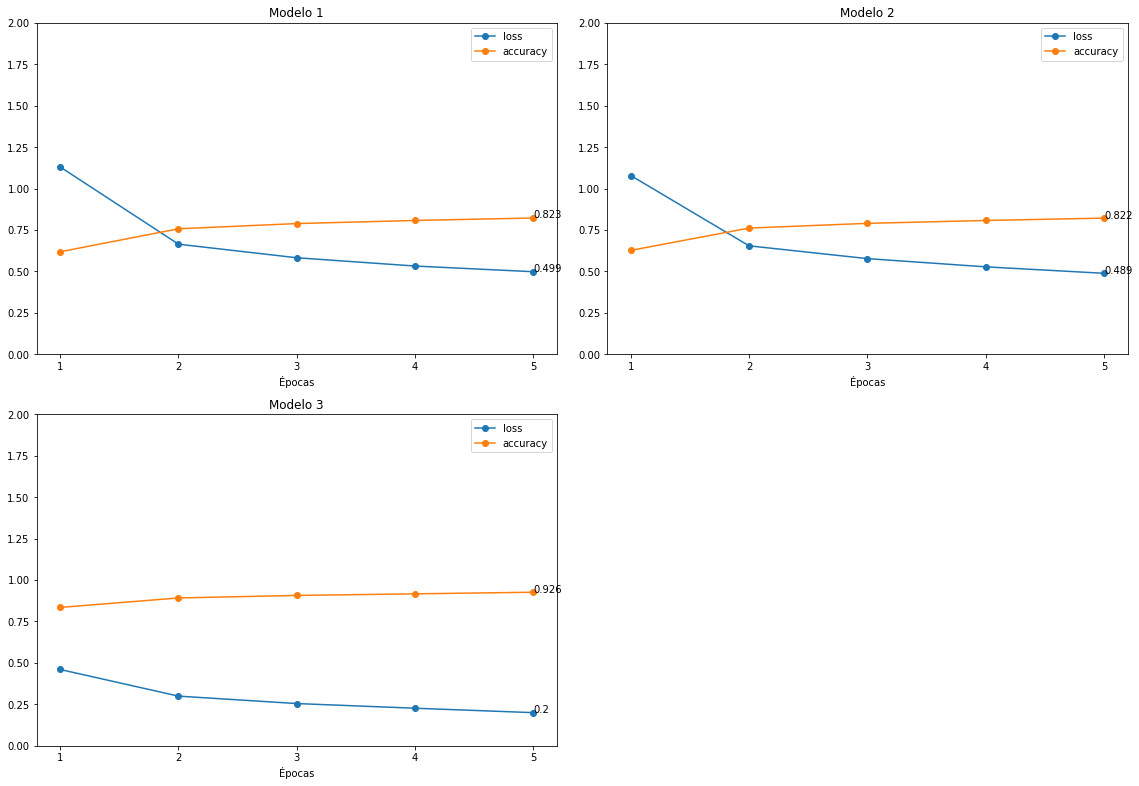

In [37]:
# Plot con las curvas de aprendizaje obtenidas a partir de la lista HISTORY (ver función en apartado Funciones para graficar)
curvas_aprendizaje(HISTORY[:3], 3, 2, (16,16))

**Variantes**

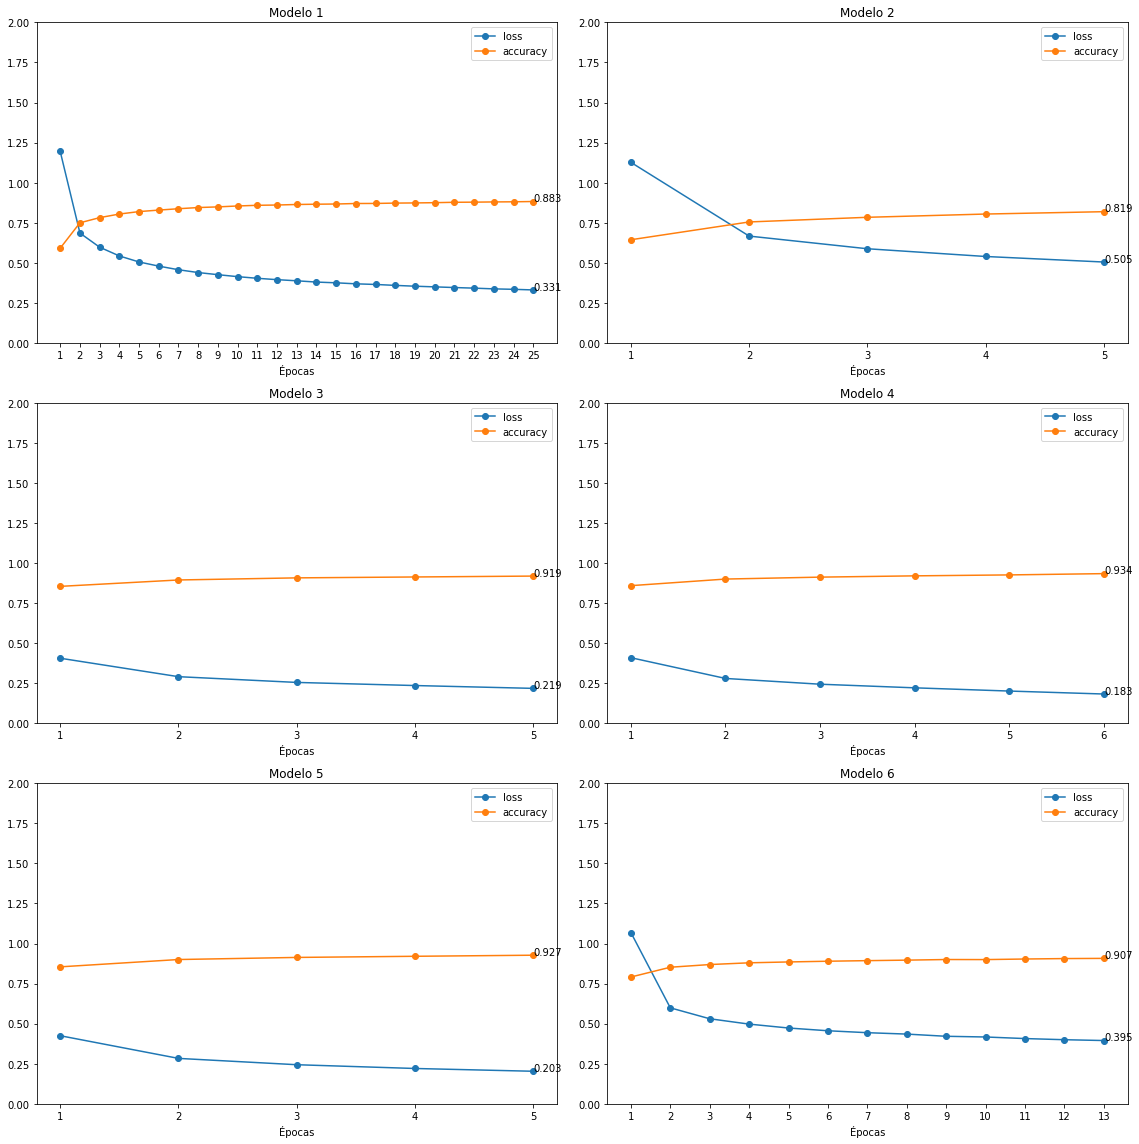

In [38]:
# Plot con las curvas de aprendizaje de las variantes
curvas_aprendizaje(HISTORY[3:], 3, 2, (16,16))

### Matrices de confusión

En este apartado observamos los tipos de predicciones (correctas e incorrectas) que realizan nuestros 8 modelos distintos. Para ello, tenemos en cuenta la matriz de confusión donde podemos ver los VP (verdaderos positivos), VN (verdaderos negativos), FP (falsos positivos), FN (falsos negativos). En la siguiente tabla entendemos mejor como funcionaría esto para un modelo de clasificación binaria:

In [39]:
from tensorflow.python import test
predictions1 = modelo_1.predict(test_images)
predictions2 = modelo_2.predict(test_images) 
predictions3 = modelo_3.predict(test_images)

# Variantes
predictions1_v1 = modelo_1_variante_1.predict(test_images)
predictions1_v2 = modelo_1_variante_2.predict(test_images)

predictions3_v1 = modelo_3_variante_3.predict(test_images)
predictions3_v2 = modelo_3_mejorado1.predict(test_images)
predictions3_v3 = modelo_3_mejorado2.predict(test_images)
predictions_prueba = prueba.predict(test_images)
predictions3_v4 = modelo_3_variante_4.predict(test_images)

313/313 [==============================] - 1s 2ms/step


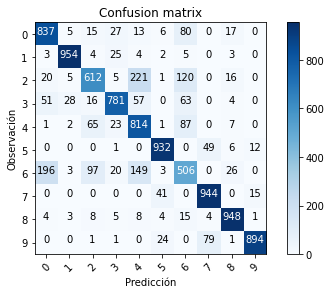

In [40]:
# Modelo 1
# Nota. Solucionado, el problema era que las etiquetas (labels) no están en formato one-hot encoding (porque utilizamos sparse_categorical_cross_estropy) por lo que en la función
# show_confusion matrix he cambiado Y_true = test_labels en vez de Y_true = np.argmax(test_labels, axis = 1)
show_confusion_matrix(predictions1)

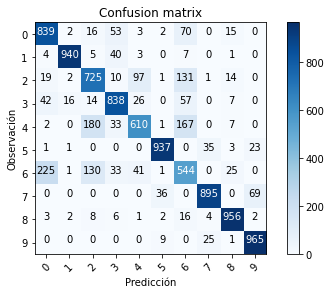

In [41]:
# Modelo 2
show_confusion_matrix(predictions2)

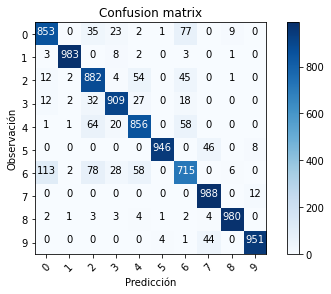

In [42]:
# Modelo 3
show_confusion_matrix(predictions3)

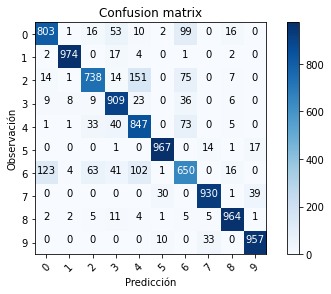

In [43]:
# Modelo 1 - Variante 1
show_confusion_matrix(predictions1_v1)

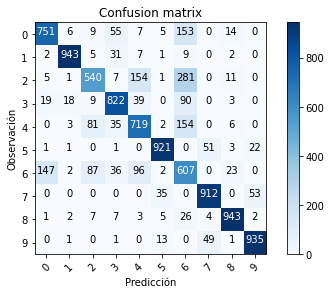

In [44]:
# Modelo 1 - Variante 2
show_confusion_matrix(predictions1_v2)

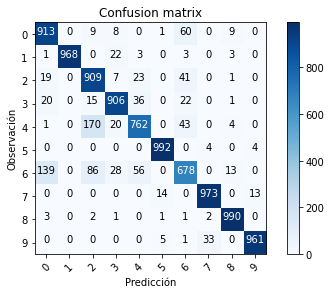

In [45]:
show_confusion_matrix(predictions3_v1)

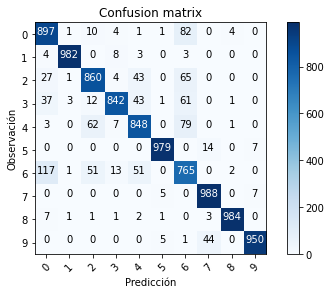

In [46]:
show_confusion_matrix(predictions3_v2)

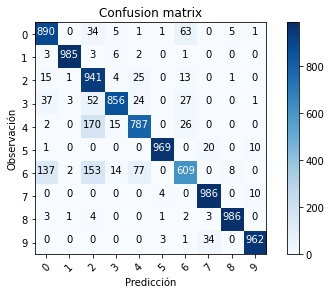

In [47]:
show_confusion_matrix(predictions3_v3)

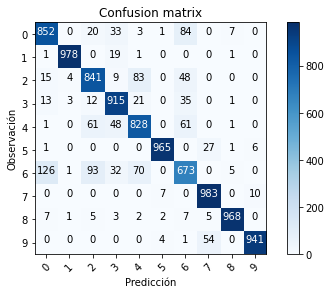

In [48]:
show_confusion_matrix(predictions_prueba)

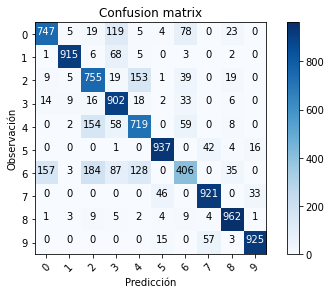

In [49]:
show_confusion_matrix(predictions3_v4)

### Predicciones

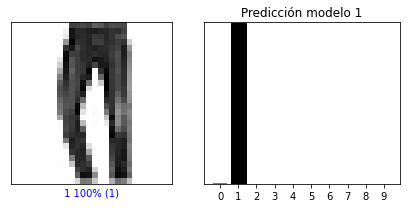

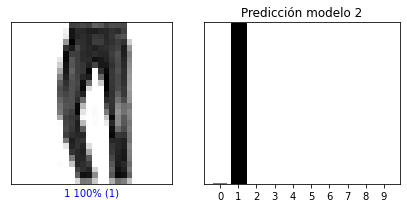

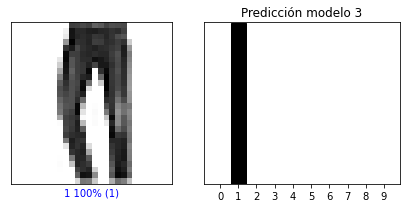

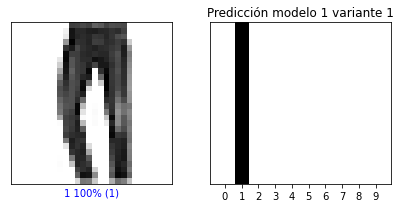

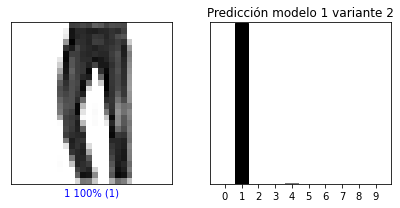

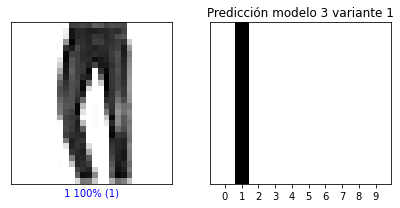

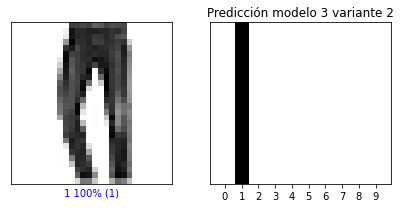

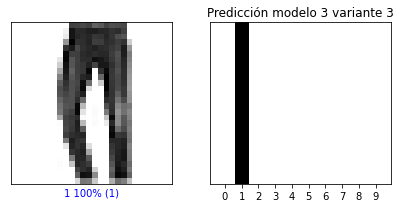

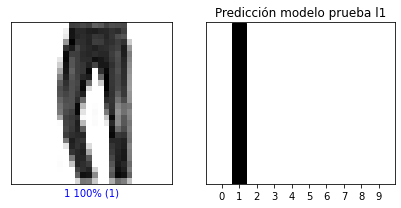

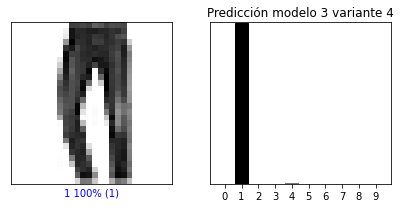

In [50]:
show_single_predicted_dist(predictions1, 5, title="Predicción modelo 1")
show_single_predicted_dist(predictions2, 5, title="Predicción modelo 2")
show_single_predicted_dist(predictions3, 5, title="Predicción modelo 3")
show_single_predicted_dist(predictions1_v1, 5, title="Predicción modelo 1 variante 1")
show_single_predicted_dist(predictions1_v2, 5, title="Predicción modelo 1 variante 2")
show_single_predicted_dist(predictions3_v1, 5, title="Predicción modelo 3 variante 1")
show_single_predicted_dist(predictions3_v2, 5, title="Predicción modelo 3 variante 2")
show_single_predicted_dist(predictions3_v3, 5, title="Predicción modelo 3 variante 3")
show_single_predicted_dist(predictions_prueba, 5, title="Predicción modelo prueba l1")
show_single_predicted_dist(predictions3_v4, 5, title="Predicción modelo 3 variante 4")

Esta imagen no es problema para ninguno de los modelos, todos la predicen con un 100% de precisión.

### Distribución de probabilidades

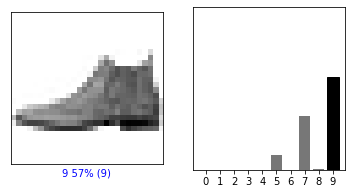

<Figure size 432x288 with 0 Axes>

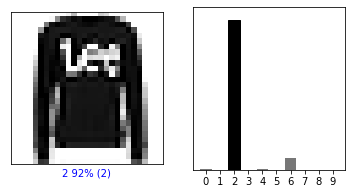

<Figure size 432x288 with 0 Axes>

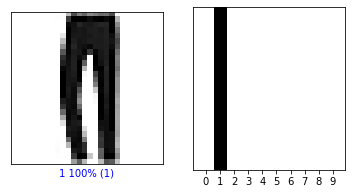

<Figure size 432x288 with 0 Axes>

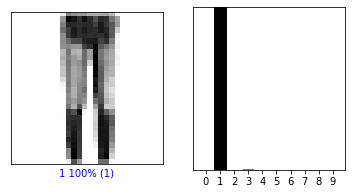

<Figure size 432x288 with 0 Axes>

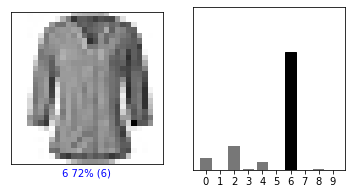

<Figure size 432x288 with 0 Axes>

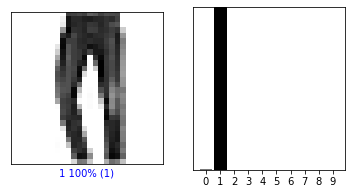

<Figure size 432x288 with 0 Axes>

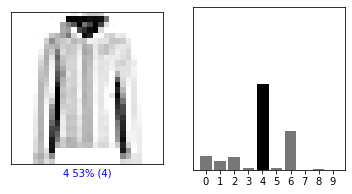

<Figure size 432x288 with 0 Axes>

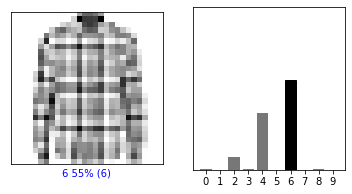

<Figure size 432x288 with 0 Axes>

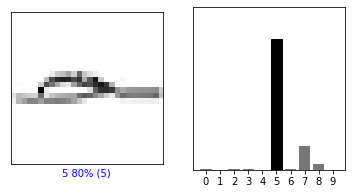

<Figure size 432x288 with 0 Axes>

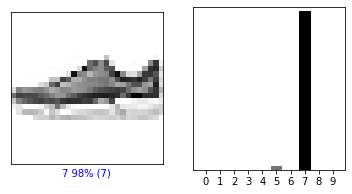

<Figure size 432x288 with 0 Axes>

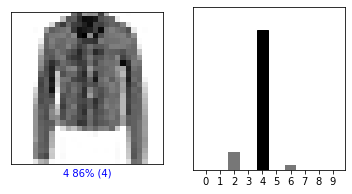

<Figure size 432x288 with 0 Axes>

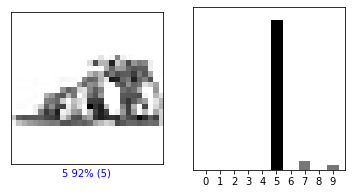

<Figure size 432x288 with 0 Axes>

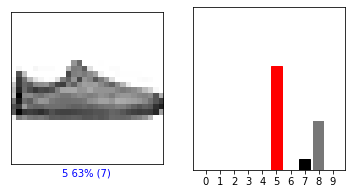

<Figure size 432x288 with 0 Axes>

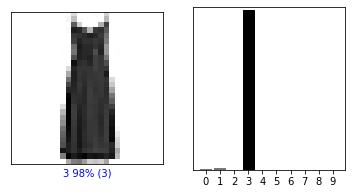

<Figure size 432x288 with 0 Axes>

In [51]:
# Predicciones de las 14 primeras imagenes de test
# Modelo 1 
# Nota. Mismo problema que con las matrices de confusión
show_predicted_distributions(predictions1, 14)

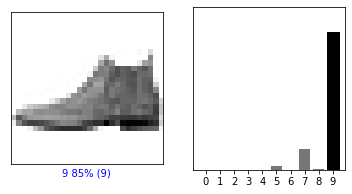

<Figure size 432x288 with 0 Axes>

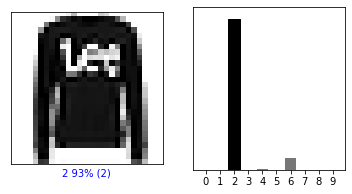

<Figure size 432x288 with 0 Axes>

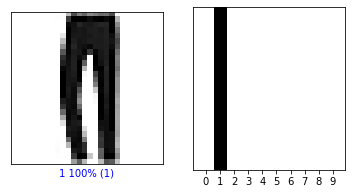

<Figure size 432x288 with 0 Axes>

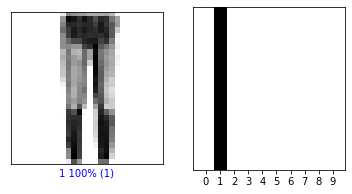

<Figure size 432x288 with 0 Axes>

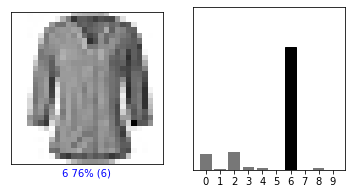

<Figure size 432x288 with 0 Axes>

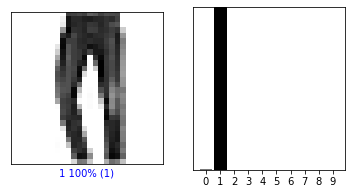

<Figure size 432x288 with 0 Axes>

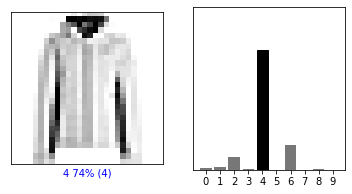

<Figure size 432x288 with 0 Axes>

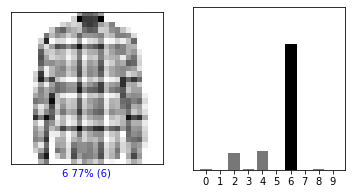

<Figure size 432x288 with 0 Axes>

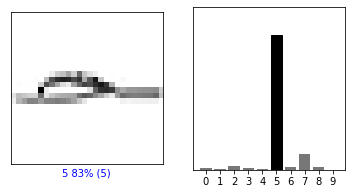

<Figure size 432x288 with 0 Axes>

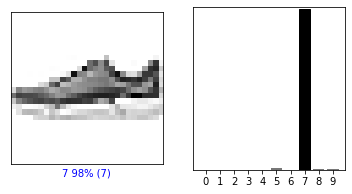

<Figure size 432x288 with 0 Axes>

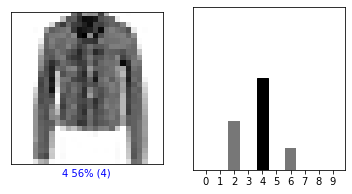

<Figure size 432x288 with 0 Axes>

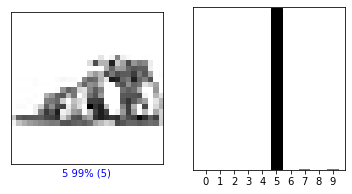

<Figure size 432x288 with 0 Axes>

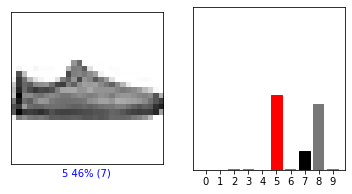

<Figure size 432x288 with 0 Axes>

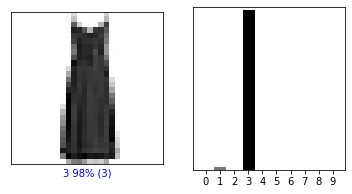

<Figure size 432x288 with 0 Axes>

In [52]:
#Modelo 2
show_predicted_distributions(predictions2, 14)

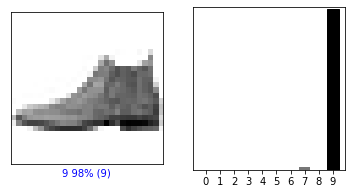

<Figure size 432x288 with 0 Axes>

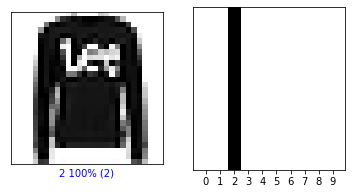

<Figure size 432x288 with 0 Axes>

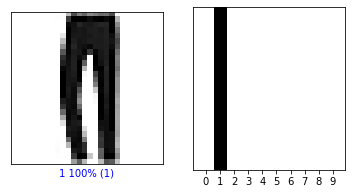

<Figure size 432x288 with 0 Axes>

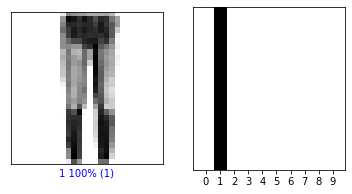

<Figure size 432x288 with 0 Axes>

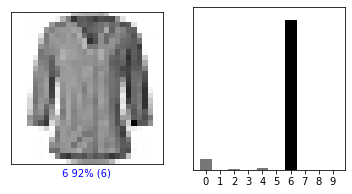

<Figure size 432x288 with 0 Axes>

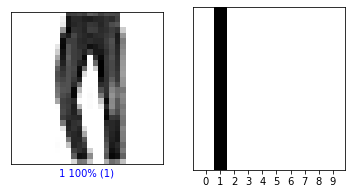

<Figure size 432x288 with 0 Axes>

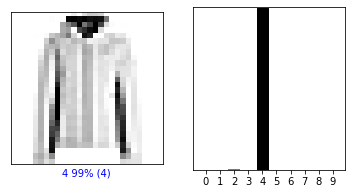

<Figure size 432x288 with 0 Axes>

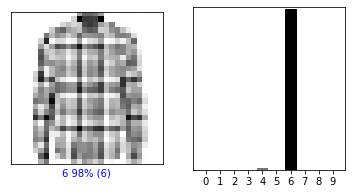

<Figure size 432x288 with 0 Axes>

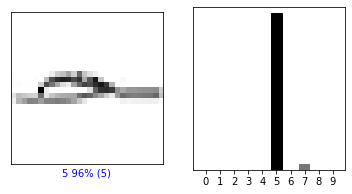

<Figure size 432x288 with 0 Axes>

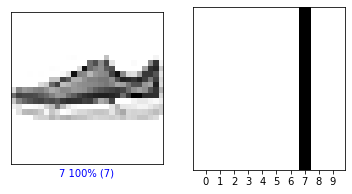

<Figure size 432x288 with 0 Axes>

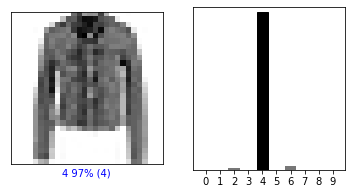

<Figure size 432x288 with 0 Axes>

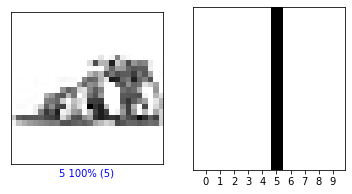

<Figure size 432x288 with 0 Axes>

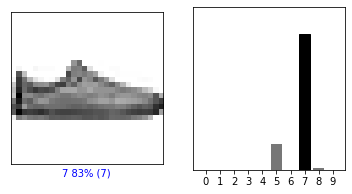

<Figure size 432x288 with 0 Axes>

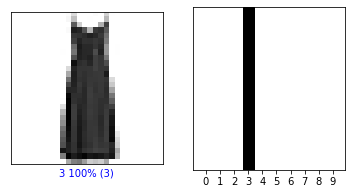

<Figure size 432x288 with 0 Axes>

In [53]:
# Modelo 3
show_predicted_distributions(predictions3, 14)

Como se puede observar, el modelo que mejor predice las imágenes es el tercero, las catorce imágenes las predice con más de un 96% salvo algunos casos como la decimotercera imagen que es un problema en todos los modelos, es confundida con una sandalia o las imágenes correspondientes de camisas que las predicen peor por la confusión con las camisetas.

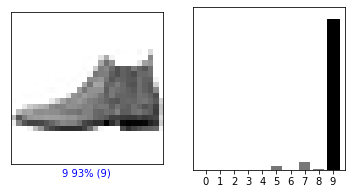

<Figure size 432x288 with 0 Axes>

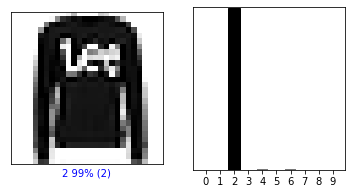

<Figure size 432x288 with 0 Axes>

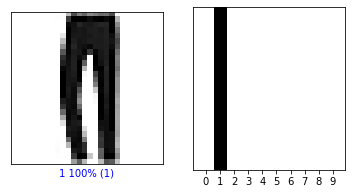

<Figure size 432x288 with 0 Axes>

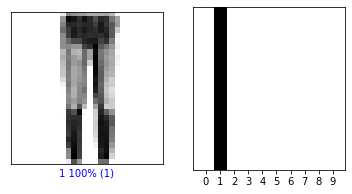

<Figure size 432x288 with 0 Axes>

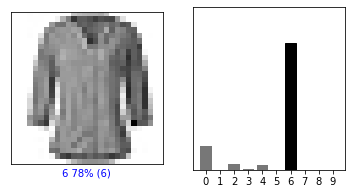

<Figure size 432x288 with 0 Axes>

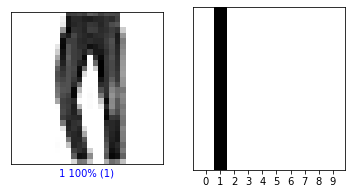

<Figure size 432x288 with 0 Axes>

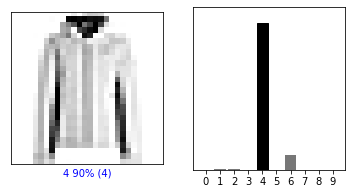

<Figure size 432x288 with 0 Axes>

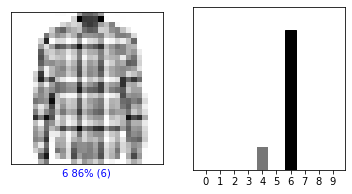

<Figure size 432x288 with 0 Axes>

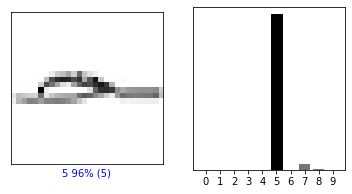

<Figure size 432x288 with 0 Axes>

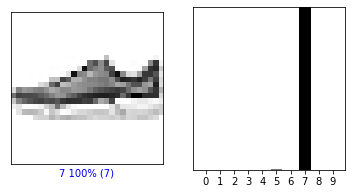

<Figure size 432x288 with 0 Axes>

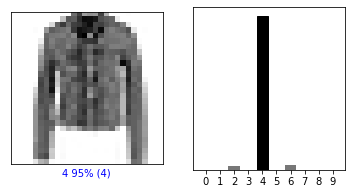

<Figure size 432x288 with 0 Axes>

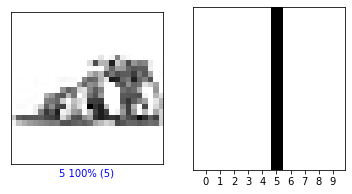

<Figure size 432x288 with 0 Axes>

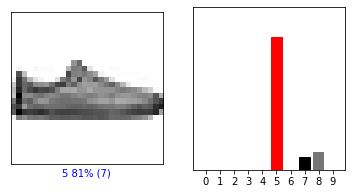

<Figure size 432x288 with 0 Axes>

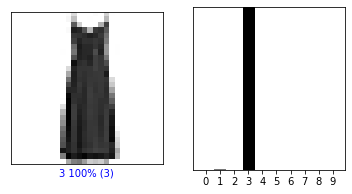

<Figure size 432x288 with 0 Axes>

In [54]:
# Modelo 1 - Variantes 1
show_predicted_distributions(predictions1_v1, 14)

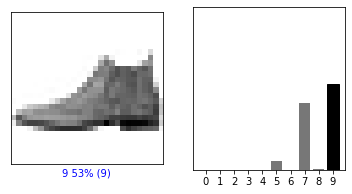

<Figure size 432x288 with 0 Axes>

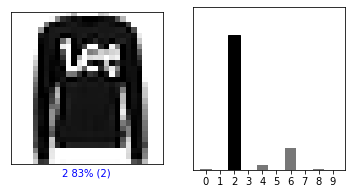

<Figure size 432x288 with 0 Axes>

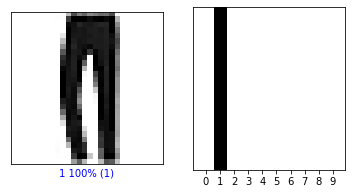

<Figure size 432x288 with 0 Axes>

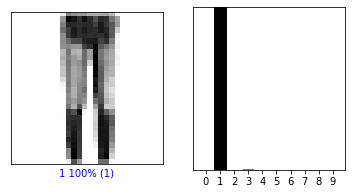

<Figure size 432x288 with 0 Axes>

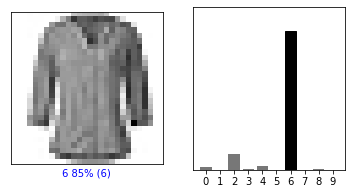

<Figure size 432x288 with 0 Axes>

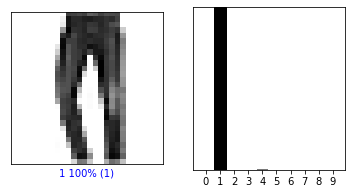

<Figure size 432x288 with 0 Axes>

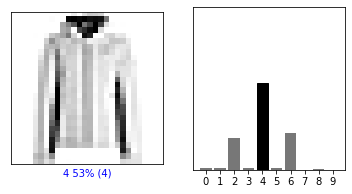

<Figure size 432x288 with 0 Axes>

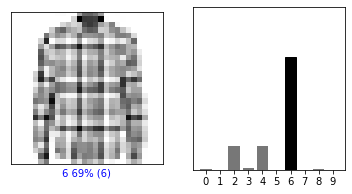

<Figure size 432x288 with 0 Axes>

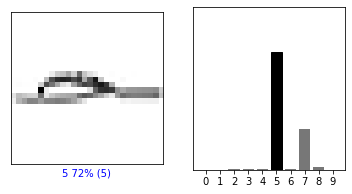

<Figure size 432x288 with 0 Axes>

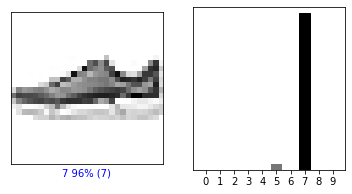

<Figure size 432x288 with 0 Axes>

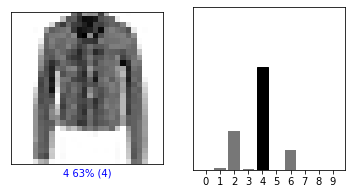

<Figure size 432x288 with 0 Axes>

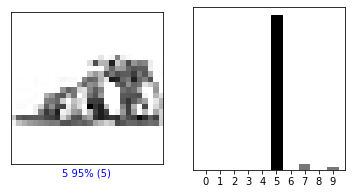

<Figure size 432x288 with 0 Axes>

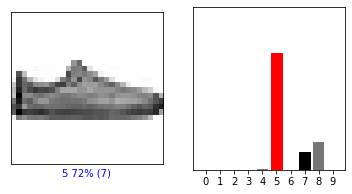

<Figure size 432x288 with 0 Axes>

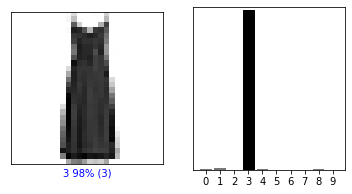

<Figure size 432x288 with 0 Axes>

In [55]:
# Modelo 1 - Variante 2
show_predicted_distributions(predictions1_v2, 14)

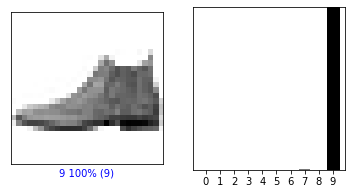

<Figure size 432x288 with 0 Axes>

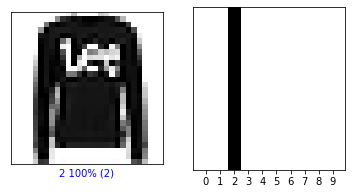

<Figure size 432x288 with 0 Axes>

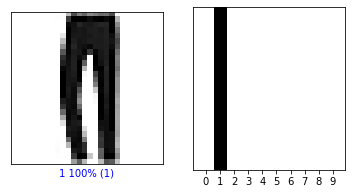

<Figure size 432x288 with 0 Axes>

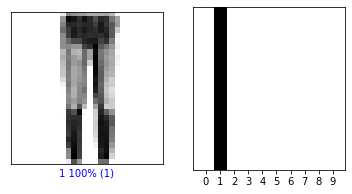

<Figure size 432x288 with 0 Axes>

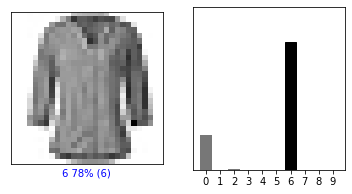

<Figure size 432x288 with 0 Axes>

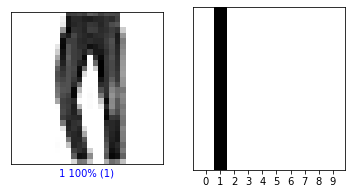

<Figure size 432x288 with 0 Axes>

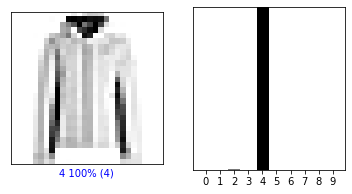

<Figure size 432x288 with 0 Axes>

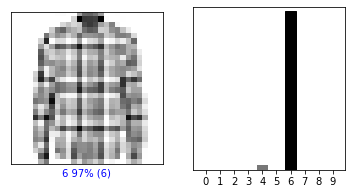

<Figure size 432x288 with 0 Axes>

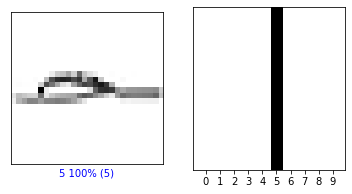

<Figure size 432x288 with 0 Axes>

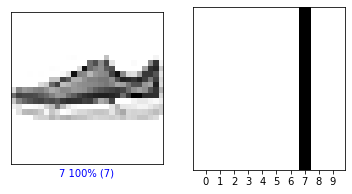

<Figure size 432x288 with 0 Axes>

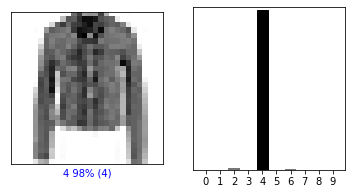

<Figure size 432x288 with 0 Axes>

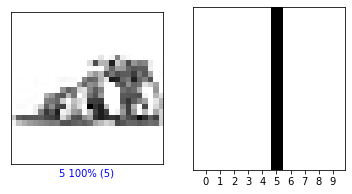

<Figure size 432x288 with 0 Axes>

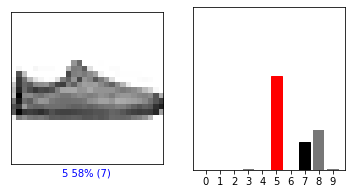

<Figure size 432x288 with 0 Axes>

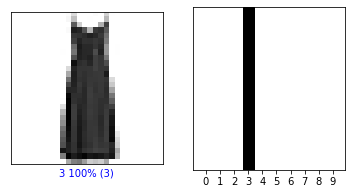

<Figure size 432x288 with 0 Axes>

In [56]:
# Modelo 3 - Variante 1
show_predicted_distributions(predictions3_v1, 14)

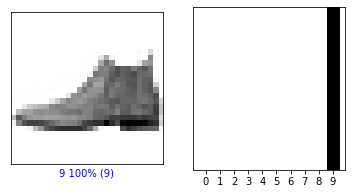

<Figure size 432x288 with 0 Axes>

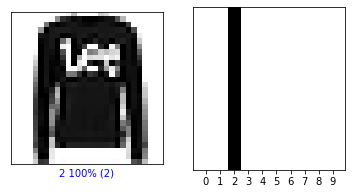

<Figure size 432x288 with 0 Axes>

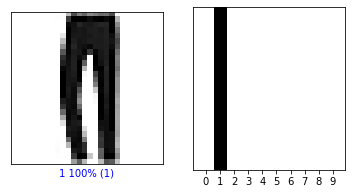

<Figure size 432x288 with 0 Axes>

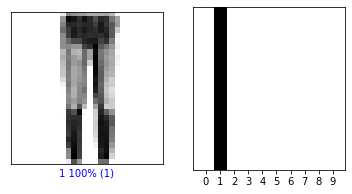

<Figure size 432x288 with 0 Axes>

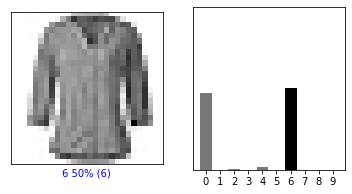

<Figure size 432x288 with 0 Axes>

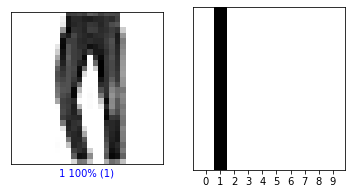

<Figure size 432x288 with 0 Axes>

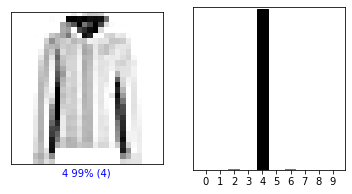

<Figure size 432x288 with 0 Axes>

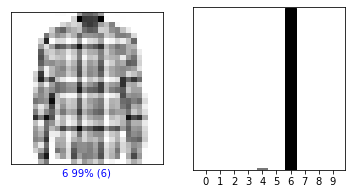

<Figure size 432x288 with 0 Axes>

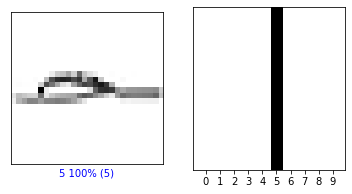

<Figure size 432x288 with 0 Axes>

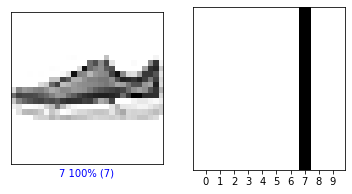

<Figure size 432x288 with 0 Axes>

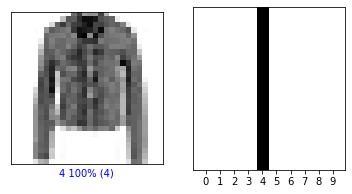

<Figure size 432x288 with 0 Axes>

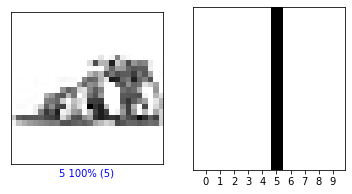

<Figure size 432x288 with 0 Axes>

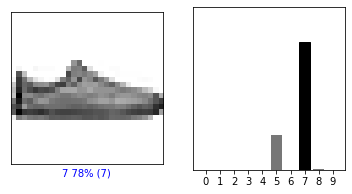

<Figure size 432x288 with 0 Axes>

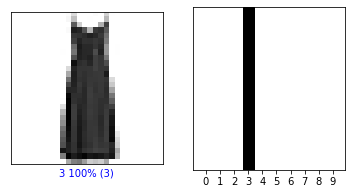

<Figure size 432x288 with 0 Axes>

In [57]:
# Modelo 3 - Variante 2
show_predicted_distributions(predictions3_v2, 14)

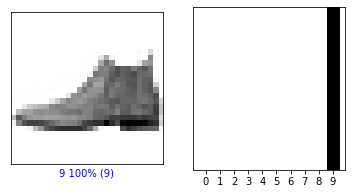

<Figure size 432x288 with 0 Axes>

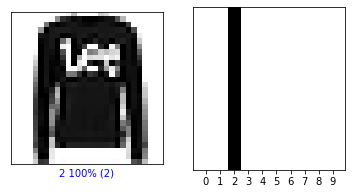

<Figure size 432x288 with 0 Axes>

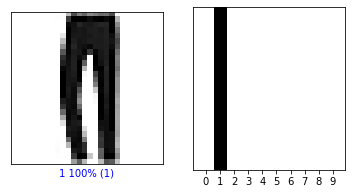

<Figure size 432x288 with 0 Axes>

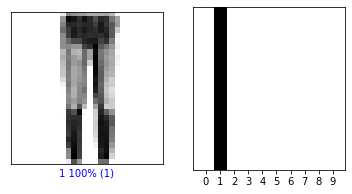

<Figure size 432x288 with 0 Axes>

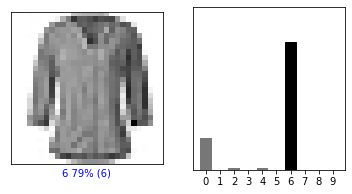

<Figure size 432x288 with 0 Axes>

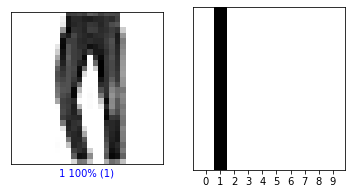

<Figure size 432x288 with 0 Axes>

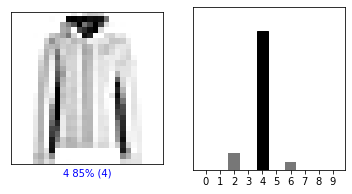

<Figure size 432x288 with 0 Axes>

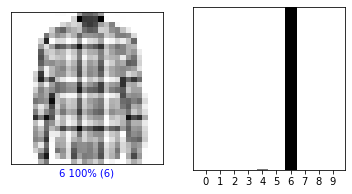

<Figure size 432x288 with 0 Axes>

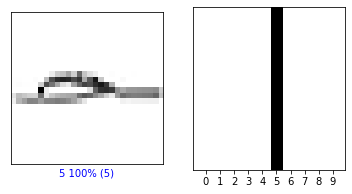

<Figure size 432x288 with 0 Axes>

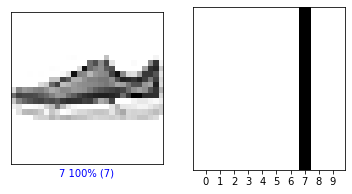

<Figure size 432x288 with 0 Axes>

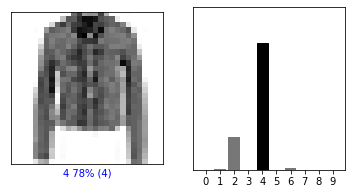

<Figure size 432x288 with 0 Axes>

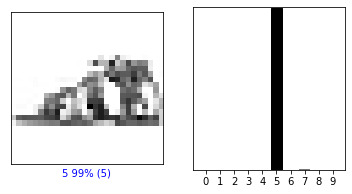

<Figure size 432x288 with 0 Axes>

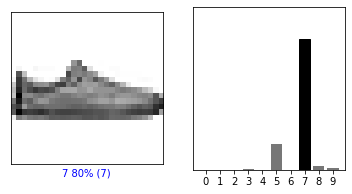

<Figure size 432x288 with 0 Axes>

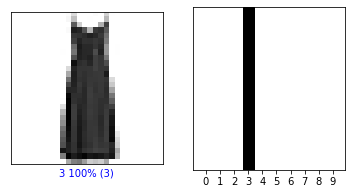

<Figure size 432x288 with 0 Axes>

In [58]:
# Modelo 3 - Variante 3
show_predicted_distributions(predictions3_v3, 14)

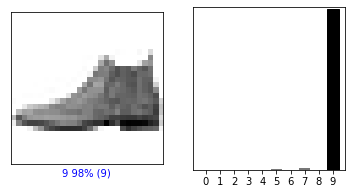

<Figure size 432x288 with 0 Axes>

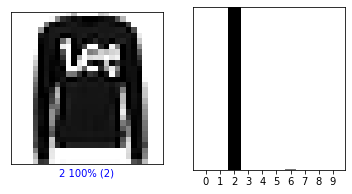

<Figure size 432x288 with 0 Axes>

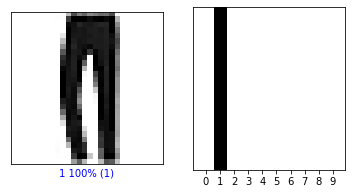

<Figure size 432x288 with 0 Axes>

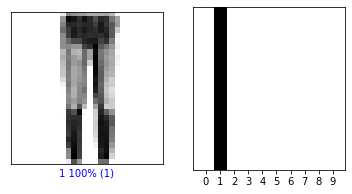

<Figure size 432x288 with 0 Axes>

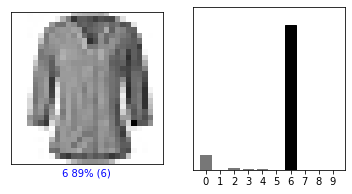

<Figure size 432x288 with 0 Axes>

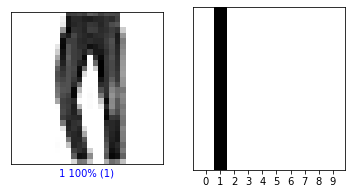

<Figure size 432x288 with 0 Axes>

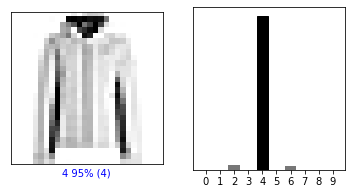

<Figure size 432x288 with 0 Axes>

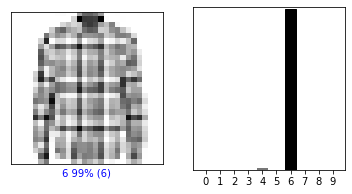

<Figure size 432x288 with 0 Axes>

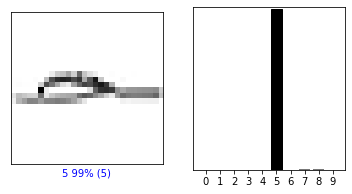

<Figure size 432x288 with 0 Axes>

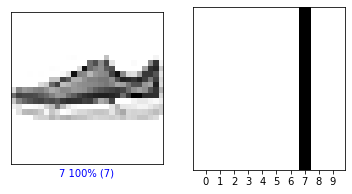

<Figure size 432x288 with 0 Axes>

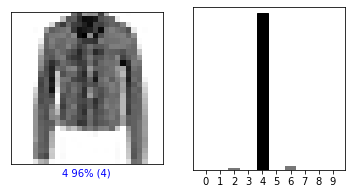

<Figure size 432x288 with 0 Axes>

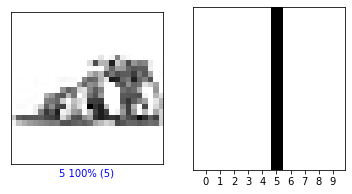

<Figure size 432x288 with 0 Axes>

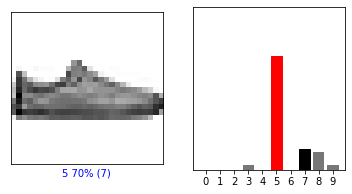

<Figure size 432x288 with 0 Axes>

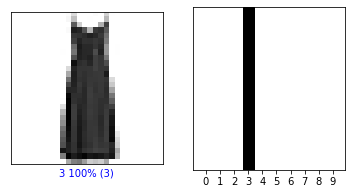

<Figure size 432x288 with 0 Axes>

In [59]:
# Modelo Prueba l1
show_predicted_distributions(predictions_prueba, 14)

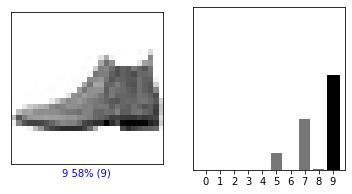

<Figure size 432x288 with 0 Axes>

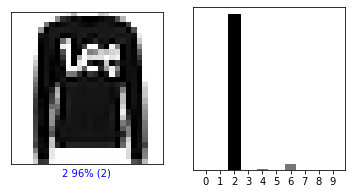

<Figure size 432x288 with 0 Axes>

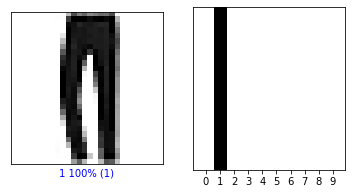

<Figure size 432x288 with 0 Axes>

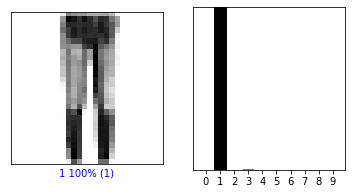

<Figure size 432x288 with 0 Axes>

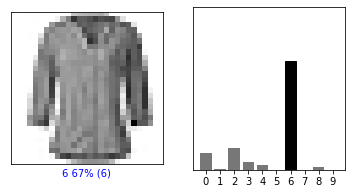

<Figure size 432x288 with 0 Axes>

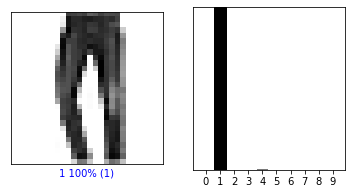

<Figure size 432x288 with 0 Axes>

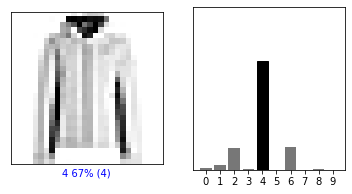

<Figure size 432x288 with 0 Axes>

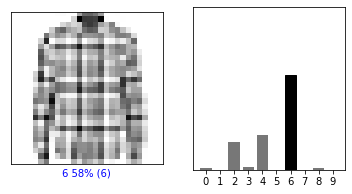

<Figure size 432x288 with 0 Axes>

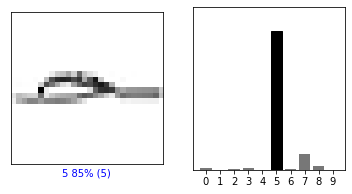

<Figure size 432x288 with 0 Axes>

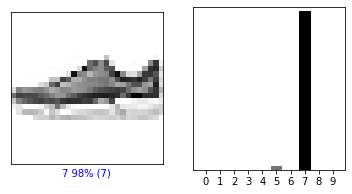

<Figure size 432x288 with 0 Axes>

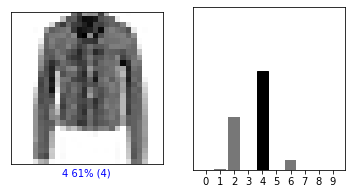

<Figure size 432x288 with 0 Axes>

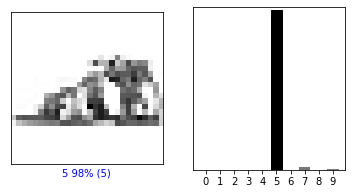

<Figure size 432x288 with 0 Axes>

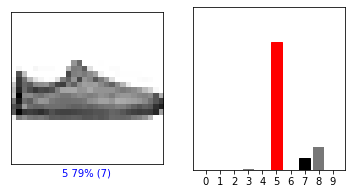

<Figure size 432x288 with 0 Axes>

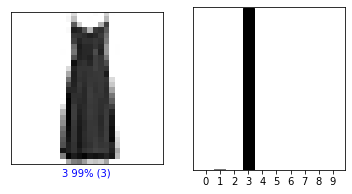

<Figure size 432x288 with 0 Axes>

In [60]:
# Modelo 3 - Variante 4
show_predicted_distributions(predictions3_v4, 14)

### Test error y test accuracy

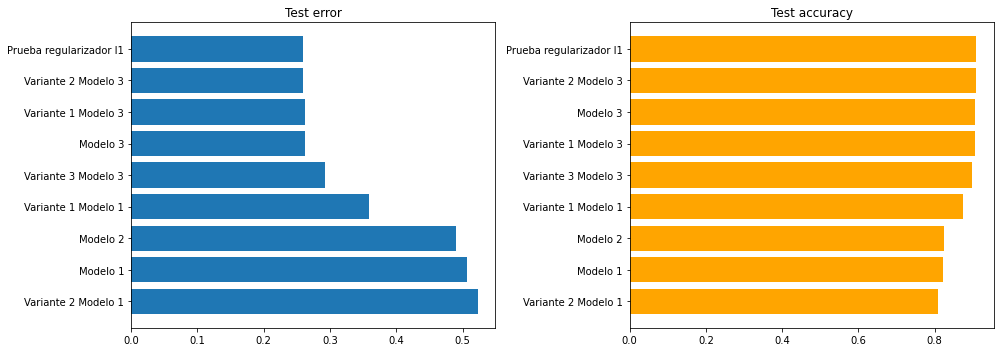

In [61]:
# Gráfica de barras horizontales con los errores y accuracy de cada modelo (TEST_LOSS, TEST_ACC) 
# Crear función en apartado Funciones para graficar
title = ['Modelo ' + str(i+1) for i in range(3)]
title += ['Variante 1 Modelo 1', 'Variante 2 Modelo 1']
title += ['Variante 1 Modelo 3', 'Variante 2 Modelo 3', 'Variante 3 Modelo 3', 'Prueba regularizador l1', 'Variante 4 Modelo 3']
testerror_testacc(TEST_LOSS, TEST_ACC, title, (14, 5))

# Conclusiones finales
Tal y como podemos observar en los resultados, por ejemplo, si nos fijamos en las gráficas de test error y test accuracy podemos ver que el modelo 3 es el más efectivo. Con una pérdida de 0.25 y una precisión de 0.9, aproximadamente.
Por otra parte, los modelos 1, 2 y la variante 2, son muy similares con una pérdida de 0.5.
Pensamos que la mejoría del modelo 3 frente a estos, se debe a la utilización del optimizador 'adam', ya que los demas parámetros e hiperparámetros son prácticamente los mismos.

### Caso 1 frente variante 1 
Al graficar la variante 1 observamos que no hay un sobreentrenamiento. Por ello, notamos una mejoría en la variante 1, sobre todo en el decaimiento de la función de pérdida frente al caso 1. Pasando de un 0.5 a un 0.3, además del aumento en más de un 6% en la precisión, por lo que podemos decir que es mejor la variante que el modelo inicial.

Con lo que podemos concluir que aumentar las épocas resulta un modelo más óptimo. La comparativa con el modelo 1 la vemos claramente en las gráficas en el apartado de test error y test accurary.

### Caso 1 frente variante 2
Podemos observar que independientemente de la función de activación que se use (relu o tanh), la pérdida y la precisión es prácticamente la misma. Por lo tanto, podemos concluir que el cambio de la función de activación no supone una mejoría ni una decaída, cuando se mantiene el resto de parámetros e hiperparámetros.

### Práctica 2 frente práctica 1
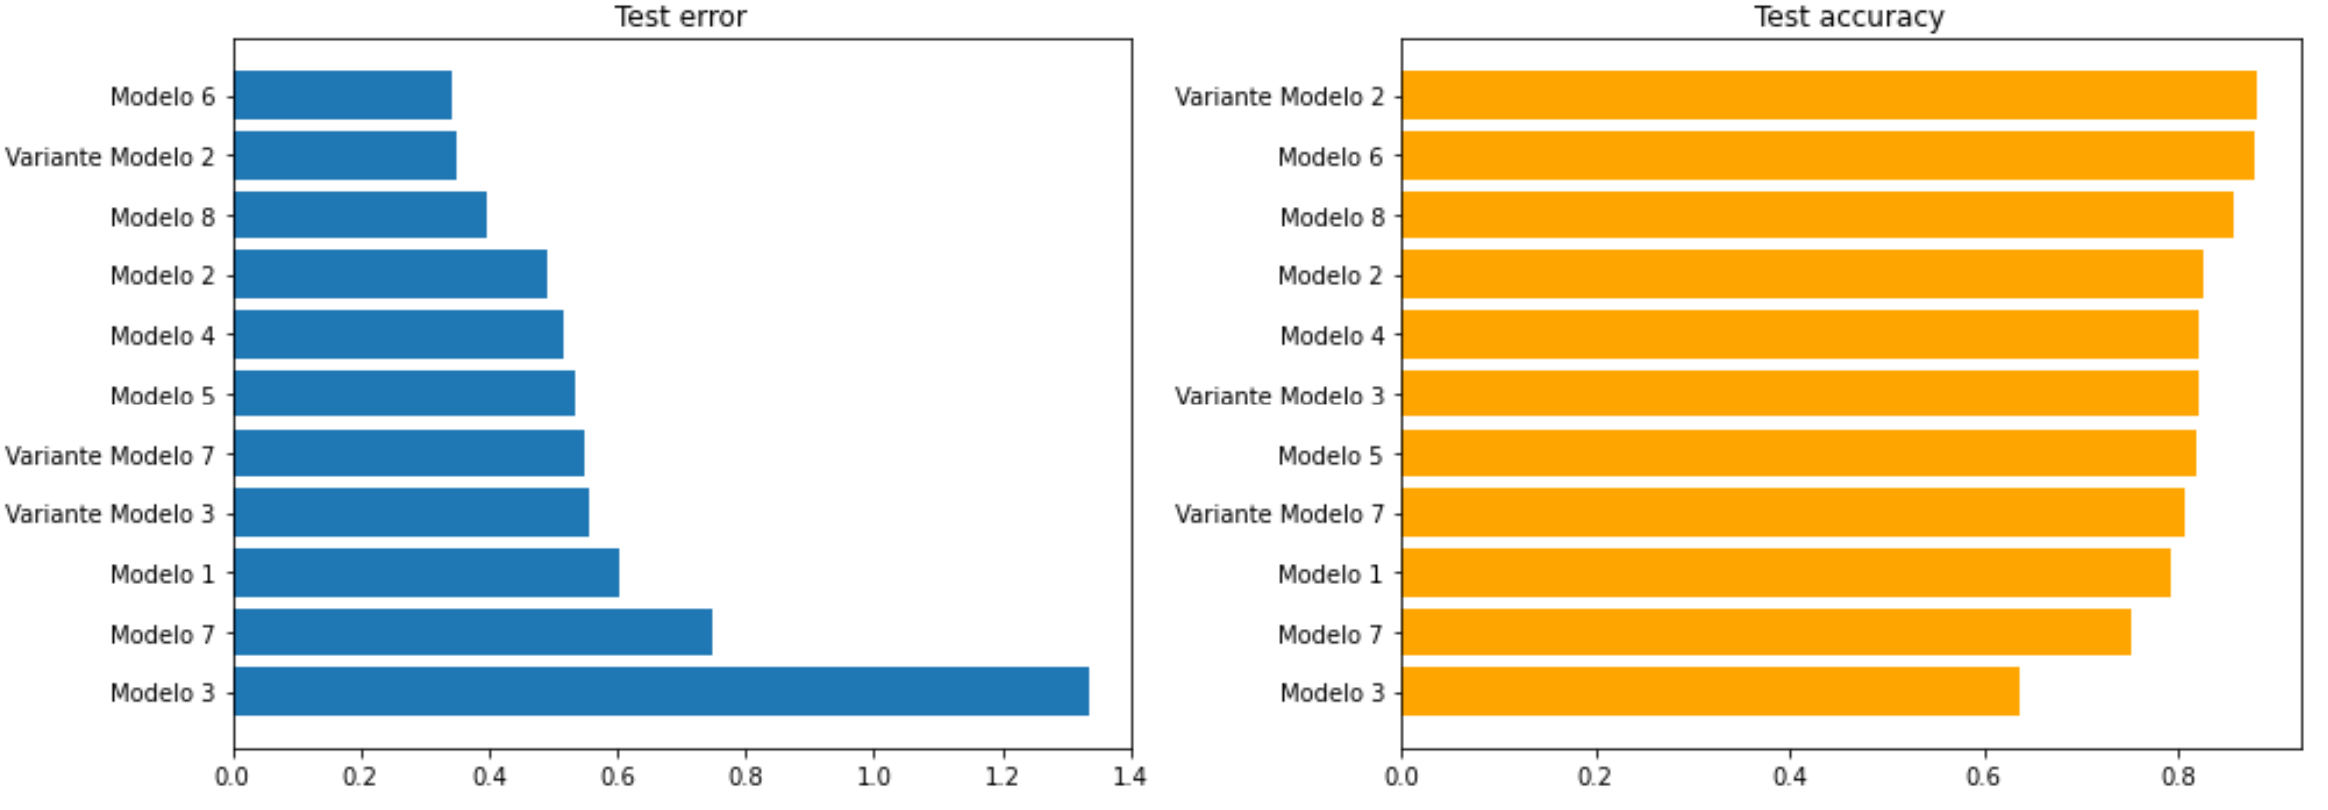


Para recordar los resultados de la primera práctica y realizar una comparativa, mostramos las gráficas de la misma.

En general, los modelos de esta segunda práctica son mejores ya que predicen de manera más óptima las diferentes clases.

Comparando el mejor caso de cada una de las dos prácticas (modelo 6 y variante modelo 2 de la primera y el modelo 3 de la segunda) si nos fijamos detenidamente en la pérdida de estos, podemos ver que en el modelo 3 de la segunda práctica conseguimos reducir alrededor de un 10%.

Lo mismo podemos ver para los peores casos, se ve claramente que en tanto en la pérdida como en la precisión la diferencia que hay entre estos son muy notables. Esto nos dice que las redes convolucionales son mucho más eficaces.